# IMDB Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (20, 5)

## Database engine

In [2]:
# import psycopg2
# from sqlalchemy import create_engine

# coder_db = create_engine('postgresql://localhost/imdb_data')

## Create database

In [3]:
# conn = psycopg2.connect(
#     database='postgres',
#     user='anicolon',
#     password='mignola12',
#     host='127.0.0.1',
#     port='5432',
# )

# conn.autocommit = True
# a
# # Creating a cursor object using the cursor() method
# cursor = conn.cursor()

# # Preparing query to create a database
# sql = '''CREATE database imdb_data'''

# # Creating a database
# cursor.execute(sql)
# print('Database created successfully........')

# # Closing the connection
# conn.close()

## DataFrames to PostgreSQL

In [4]:
name_basics = pd.read_csv(
    '/Users/anicolon/Downloads/imdb_datasets/name.basics.tsv',
    sep='\t',
    low_memory=False,
)

In [5]:
# name_basics.to_sql('name_basics', con=coder_db, if_exists='fail')

In [6]:
title_basics = pd.read_csv(
    '/Users/anicolon/Downloads/imdb_datasets/title.basics.tsv',
    sep='\t',
    low_memory=False,
)

In [7]:
# title_basics.to_sql('title_basics', con=coder_db, if_exists='fail')

In [8]:
episode_basics = pd.read_csv(
    '/Users/anicolon/Downloads/imdb_datasets/title.episode.tsv',
    sep='\t',
    low_memory=False,
)

In [9]:
# episode_basics.to_sql('episode_basics', con=coder_db, if_exists='fail')

In [10]:
title_principals = pd.read_csv(
    '/Users/anicolon/Downloads/imdb_datasets/title.principals.tsv',
    sep='\t',
    low_memory=False,
)

In [11]:
# title_principals.to_sql('title_principals', con=coder_db, if_exists='fail')

In [12]:
title_ratings = pd.read_csv(
    '/Users/anicolon/Downloads/imdb_datasets/title.ratings.tsv',
    sep='\t',
    low_memory=False,
)

In [13]:
# title_ratings.to_sql('title_ratings', con=coder_db, if_exists='fail')

## PostgreSQL query

In [14]:
# query = ''' SELECT * FROM name_basics LIMIT 10;'''
# pd.read_sql_query(query, coder_db)

## Name basics

In [15]:
# name_basics = pd.read_sql('name_basics', coder_db)

name_basics.head(5)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0038355,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0056404,tt0054452,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0072562,tt0080455,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0069467,tt0050976,tt0050986"


## Birth year

<AxesSubplot:ylabel='birthYear'>

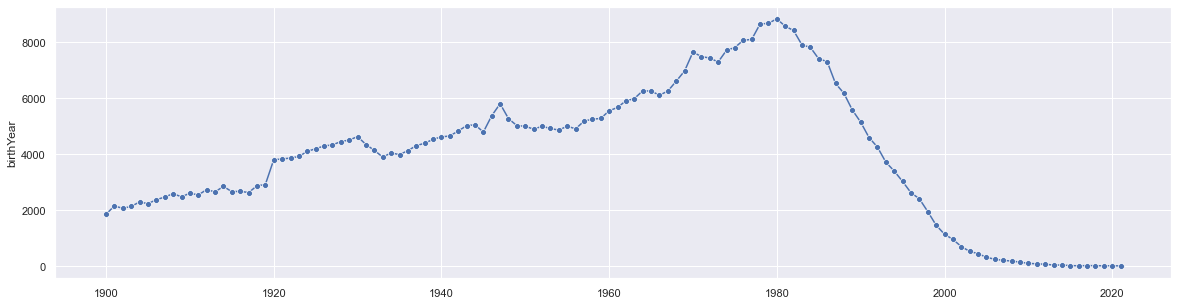

In [16]:
name_basics = name_basics[~name_basics['birthYear'].str.contains('N')]
name_basics['birthYear'] = pd.to_datetime(name_basics['birthYear'], errors = 'coerce')

name_basics['birthYear'] = name_basics['birthYear'].astype('datetime64')
name_basics = name_basics[name_basics['birthYear'] >= '1900']

sns.lineplot(data=name_basics['birthYear'].value_counts(),marker='o')

## Born this year

In [17]:
kids2021 = name_basics[name_basics['birthYear'] > '2020']
kids2021['primaryName']

3322465      Mae Bair
3395622     Noah Lira
3413762    Kenna Tota
Name: primaryName, dtype: object

## Has same name

In [18]:
name_basics['primaryName'].value_counts().head(10)

John Taylor        12
Mike Jones         11
Steve Smith        10
John Williams      10
Paul Smith         10
Michael Johnson    10
Paul Williams      10
Mike Smith          9
Michael Lewis       9
John Wilson         9
Name: primaryName, dtype: int64

## Same first name

In [19]:
name_basics['firstname'] = name_basics['primaryName'].str.split(' ').apply(lambda x: x[0])
name_basics['firstname'].value_counts().head(10)

John       5356
Michael    4704
David      4480
Robert     3495
Peter      3192
Paul       2547
James      2384
Richard    2282
Mark       1893
Chris      1816
Name: firstname, dtype: int64

## Same last name

In [20]:
def splitit(x):
    listed = x.split(' ')
    try:
        splited = ''.join(listed[1:])
        return splited

    except IndexError:
        listed = float('Nan')


name_basics['lastname'] = name_basics['primaryName'].apply(lambda x: splitit(x))

name_basics['lastname'].value_counts().head(10)

            5520
Smith        985
Williams     884
Lee          851
Jones        810
Johnson      802
Brown        742
Taylor       609
Miller       592
Davis        549
Name: lastname, dtype: int64

In [21]:
# TITLES TABLE

# title_basics = pd.read_sql('title_basics', coder_db)

title_basics.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


## List of genres

In [22]:
# GENRES ON DATABASE

def xstr(s):
    return 'DDELETE' if s == '\\N' else str(s)

title_basics['genres'] = title_basics['genres'].apply(lambda x: xstr(x))
title_basics = title_basics[~title_basics['genres'].str.contains('DDELETE')]

from itertools import chain

genres = pd.DataFrame(title_basics['genres'].str.split(',', expand=True))
genres_list = list(chain(genres[0].unique(), genres[1].unique(), genres[2].unique()))

In [23]:
len(list(set(genres_list)))

30

## Count of genres

In [24]:
top_genres = genres[0].append(genres[1].append(genres[2])).value_counts()

In [25]:
top_genres.head(10)

Drama          2158975
Comedy         1603419
Short           989835
Talk-Show       850121
Documentary     735413
Romance         704961
Family          547623
News            505712
Reality-TV      407544
Animation       387837
dtype: int64

In [26]:
title_basics.sample(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1586049,tt11080186,movie,Manuale sull'Alzheimer,Manuale sull'Alzheimer,0,2019,\N,\N,"Documentary,Drama"
5498287,tt4761454,tvEpisode,Episode #5.24,Episode #5.24,0,1987,\N,\N,Family
5363516,tt4455670,tvEpisode,Suicide Spam,Suicide Spam,0,2005,\N,\N,Comedy
4165085,tt2056552,video,Designing Beauty,Designing Beauty,0,2011,\N,8,"Biography,Documentary,Short"
1741484,tt11354478,tvEpisode,Garbage Gulch,Garbage Gulch,0,2019,\N,\N,Animation
3879942,tt1759226,tvEpisode,Episode dated 10 January 1995,Episode dated 10 January 1995,0,1995,\N,\N,"Family,Game-Show"
4906326,tt3423160,tvEpisode,Episode #1.143,Episode #1.143,0,1984,\N,\N,"Family,Game-Show"
3904045,tt1784994,tvEpisode,La logia,La logia,0,2010,\N,\N,Comedy
7796035,tt9749968,tvEpisode,Episode #9.28,Episode #9.28,0,2019,\N,\N,Talk-Show
6147498,tt6217120,tvEpisode,My Name Is Oliver Queen,My Name Is Oliver Queen,0,2016,\N,\N,Comedy


In [27]:
title_basics['titleType'].unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [28]:
title_movies = title_basics[title_basics['titleType'].str.contains('movie')].copy()

In [29]:
title_movies['primaryTitle'].value_counts().head(5)

Mother        44
Home          44
Hamlet        41
Broken        41
Homecoming    39
Name: primaryTitle, dtype: int64

In [30]:
title_tv = title_basics[title_basics['titleType'].str.contains('tvSeries|tvMiniSeries')].copy()

In [31]:
title_tv['primaryTitle'].value_counts().head(5)

Joulukalenteri    35
Shock Theater     30
Shock Theatre     28
Roommates         24
Spotlight         23
Name: primaryTitle, dtype: int64

In [32]:
title_games = title_basics[title_basics['titleType'].str.contains('videoGame')].copy()

In [33]:
title_games['primaryTitle'].value_counts().head(5)

Donkey Kong       6
Baseball          6
Jeopardy!         6
Star Trek         6
The Terminator    5
Name: primaryTitle, dtype: int64

In [34]:
title_movies = title_movies[title_movies['startYear'].str.len() >= 4]

In [35]:
title_movies['startYear'].astype('datetime64[Y]').max()

Timestamp('2028-01-01 00:00:00')

In [36]:
title_movies['startYear'].astype('datetime64[Y]')[title_movies['startYear'].astype('datetime64[Y]') > "2021"].unique()

array(['2022-01-01T00:00:00.000000000', '2023-01-01T00:00:00.000000000',
       '2025-01-01T00:00:00.000000000', '2027-01-01T00:00:00.000000000',
       '2024-01-01T00:00:00.000000000', '2026-01-01T00:00:00.000000000',
       '2028-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [37]:
movies_by_year = title_movies['startYear'].astype('datetime64[Y]').value_counts()

movies_by_year

2017-01-01    16997
2018-01-01    16902
2016-01-01    16626
2019-01-01    16234
2015-01-01    15693
              ...  
1903-01-01        3
2026-01-01        2
1904-01-01        2
1897-01-01        1
1896-01-01        1
Name: startYear, Length: 133, dtype: int64

In [40]:
len(title_movies['primaryTitle'])

437085

In [ ]:
sns.lineplot(data=movies_by_year,marker='o')